## Importing Required Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

## Reading the Dataset

In [23]:
fraud = pd.read_csv("../Data/Automobile_insurance_fraud.csv")
fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## Data Quality Check

In [24]:
fraud.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [25]:
for i in fraud.columns:
    print(i," ",set(fraud[i]))
    print()

months_as_customer   {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 23

In [26]:
for i in fraud.columns:
    print(i, " ",fraud[i].isna().sum())

months_as_customer   0
age   0
policy_number   0
policy_bind_date   0
policy_state   0
policy_csl   0
policy_deductable   0
policy_annual_premium   0
umbrella_limit   0
insured_zip   0
insured_sex   0
insured_education_level   0
insured_occupation   0
insured_hobbies   0
insured_relationship   0
capital-gains   0
capital-loss   0
incident_date   0
incident_type   0
collision_type   0
incident_severity   0
authorities_contacted   0
incident_state   0
incident_city   0
incident_location   0
incident_hour_of_the_day   0
number_of_vehicles_involved   0
property_damage   0
bodily_injuries   0
witnesses   0
police_report_available   0
total_claim_amount   0
injury_claim   0
property_claim   0
vehicle_claim   0
auto_make   0
auto_model   0
auto_year   0
fraud_reported   0
_c39   1000


In [27]:
for i in fraud.columns:
    print(i," ",(fraud[i] == '?').sum())

months_as_customer   0
age   0
policy_number   0
policy_bind_date   0
policy_state   0
policy_csl   0
policy_deductable   0
policy_annual_premium   0
umbrella_limit   0
insured_zip   0
insured_sex   0
insured_education_level   0
insured_occupation   0
insured_hobbies   0
insured_relationship   0
capital-gains   0
capital-loss   0
incident_date   0
incident_type   0
collision_type   178
incident_severity   0
authorities_contacted   0
incident_state   0
incident_city   0
incident_location   0
incident_hour_of_the_day   0
number_of_vehicles_involved   0
property_damage   360
bodily_injuries   0
witnesses   0
police_report_available   343
total_claim_amount   0
injury_claim   0
property_claim   0
vehicle_claim   0
auto_make   0
auto_model   0
auto_year   0
fraud_reported   0
_c39   0


## Data Visualisation

In [28]:
cross_tab = pd.crosstab(fraud['collision_type'], fraud['incident_severity'])
print(cross_tab)

incident_severity  Major Damage  Minor Damage  Total Loss  Trivial Damage
collision_type                                                           
?                             0            88           0              90
Front Collision              84            81          89               0
Rear Collision               96           100          96               0
Side Collision               96            85          95               0


In [29]:
cross_tab = pd.crosstab(fraud['property_damage'], fraud['incident_severity'])
print(cross_tab)

incident_severity  Major Damage  Minor Damage  Total Loss  Trivial Damage
property_damage                                                          
?                           115           110          97              38
NO                           74           135          98              31
YES                          87           109          85              21


In [30]:
cross_tab = pd.crosstab(fraud['police_report_available'], fraud['incident_severity'])
print(cross_tab)

incident_severity        Major Damage  Minor Damage  Total Loss  \
police_report_available                                           
?                                 105           117          91   
NO                                 91           120          94   
YES                                80           117          95   

incident_severity        Trivial Damage  
police_report_available                  
?                                    30  
NO                                   38  
YES                                  22  


## Data Imputation

In [31]:
def impute(trigger_value, column_name_to_change, reference_column_name, value):
    fraud.loc[fraud[reference_column_name] == trigger_value, column_name_to_change] = value


impute('Minor Damage', 'collision_type', 'incident_severity', 'Rear Collision')
impute('Major Damage', 'property_damage', 'incident_severity', 'YES')
impute('Minor Damage', 'property_damage', 'incident_severity', 'NO')
impute('Total Loss', 'property_damage', 'incident_severity', 'NO')
impute('Trivial Damage', 'property_damage', 'incident_severity', 'NO')
impute('Major Damage', 'police_report_available', 'incident_severity', 'NO')
impute('Minor Damage', 'police_report_available', 'incident_severity', 'NO')
impute('Total Loss', 'police_report_available', 'incident_severity', 'YES')
impute('Trivial Damage', 'police_report_available', 'incident_severity', 'NO')

In [32]:
fraud['collision_type'] = fraud['collision_type'].replace('?', None)
fraud['collision_type'].fillna(fraud['collision_type'].mode()[0], inplace=True)

## Data Wrangling

In [33]:
fraud['insured_relationship'] = fraud['insured_relationship'].replace('husband', 'spouse')
fraud['insured_relationship'] = fraud['insured_relationship'].replace('wife', 'spouse')

## Exploratory Data Analysis

## Univariate Analysis

C:\Users\Dev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

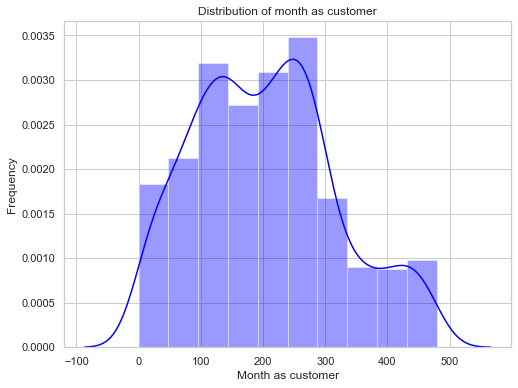

In [35]:
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(8, 6))  # Optional: Set the size of the plot

sns.distplot(fraud['months_as_customer'], kde=True, bins=10, color='blue')  # You can adjust the number of bins as needed

plt.title('Distribution of month as customer')
plt.xlabel('Month as customer')
plt.ylabel('Frequency')

C:\Users\Dev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

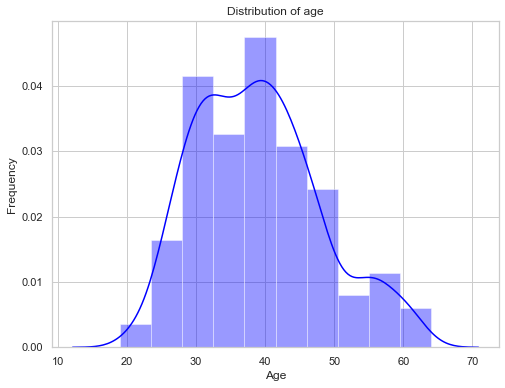

In [36]:
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(8, 6))  # Optional: Set the size of the plot

sns.distplot(fraud['age'], kde=True, bins=10, color='blue')  # You can adjust the number of bins as needed

plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')

C:\Users\Dev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

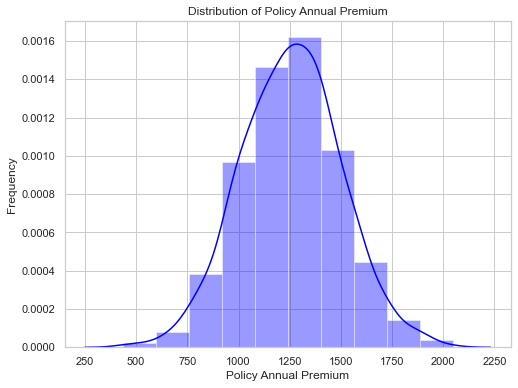

In [38]:
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(8, 6))  # Optional: Set the size of the plot

sns.distplot(fraud['policy_annual_premium'], kde=True, bins=10, color='blue')  # You can adjust the number of bins as needed

plt.title('Distribution of Policy Annual Premium')
plt.xlabel('Policy Annual Premium')
plt.ylabel('Frequency')

## Feature Selection

In [41]:
exclude_columns = ['policy_number', 'policy_bind_date', 'insured_zip', 'insured_sex', 'incident_date', 'incident_location', '_c39']
fraud1 = fraud.drop(columns=exclude_columns)
fraud1

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MD,craft-repair,sleeping,...,2,NO,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MD,machine-op-inspct,reading,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,Masters,craft-repair,paintball,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,PhD,prof-specialty,sleeping,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,Masters,armed-forces,bungie-jumping,...,3,NO,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,Associate,handlers-cleaners,base-jumping,...,1,NO,46980,5220,5220,36540,Audi,A5,1998,N


In [42]:
fraud1.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

## Data Preparation

In [43]:
fraud2 = fraud1.copy()

onehot_encoded = pd.get_dummies(fraud2['policy_state'], prefix='policy_state')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['policy_csl'], prefix='policy_csl')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['insured_education_level'], prefix='insured_education_level')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['insured_occupation'], prefix='insured_occupation')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['insured_hobbies'], prefix='insured_hobbies')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['insured_relationship'], prefix='insured_relationship')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['incident_type'], prefix='incident_type')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['collision_type'], prefix='collision_type')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['incident_severity'], prefix='incident_severity')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['authorities_contacted'], prefix='authorities_contacted')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['incident_state'], prefix='incident_state')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['incident_city'], prefix='incident_city')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['property_damage'], prefix='property_damage')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['police_report_available'], prefix='police_report_available')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['auto_make'], prefix='auto_make')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['auto_model'], prefix='auto_model')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
onehot_encoded = pd.get_dummies(fraud2['auto_year'], prefix='auto_year')
fraud2 = pd.concat([fraud2, onehot_encoded], axis=1)
fraud2['fraud_reported'] = fraud2['fraud_reported'].replace('Y', 1)
fraud2['fraud_reported'] = fraud2['fraud_reported'].replace('N', 0)
fraud2.drop(['policy_state', 'policy_csl', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship',
                     'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
                     'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'auto_year'], axis=1, inplace=True)
fraud2

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_year_2006,auto_year_2007,auto_year_2008,auto_year_2009,auto_year_2010,auto_year_2011,auto_year_2012,auto_year_2013,auto_year_2014,auto_year_2015
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,1,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,0,0,0,1,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,1,0,0,0,0,0,0,0,0,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,0,0,0,0,0,0,0,0,0,1
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,0,0,0,0,0,0,0,0,0
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X = fraud2.drop('fraud_reported', axis=1)
y = fraud2['fraud_reported']

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)


# Perform the split
for train_index, test_index in stratified_split.split(X, y):
    xtrain, xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

# Display the resulting datasets
print("Training Set:")
print(pd.concat([xtrain, ytrain], axis=1))

print("\nTesting Set:")
print(pd.concat([xtest, ytest], axis=1))

Training Set:
     months_as_customer  age  policy_deductable  policy_annual_premium  \
887                 441   55                500                1270.29   
317                 275   45               2000                1447.77   
796                 421   56                500                1935.85   
425                   4   34                500                1282.93   
991                 257   44               1000                1280.88   
..                  ...  ...                ...                    ...   
678                 276   45                500                 948.10   
789                 169   34                500                1469.75   
240                 249   43               1000                1518.46   
263                 244   40               2000                1304.67   
594                 160   38                500                1733.56   

     umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
887         4000000

## Machine Learning Modelling

## Logistic Regression

In [48]:
clf = LogisticRegression()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  0.7575
Testing Accuracy =  0.755

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       151
           1       0.50      0.04      0.08        49

    accuracy                           0.76       200
   macro avg       0.63      0.51      0.47       200
weighted avg       0.70      0.76      0.67       200



C:\Users\Dev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [49]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  1.0
Testing Accuracy =  0.82

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       151
           1       0.63      0.65      0.64        49

    accuracy                           0.82       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.82      0.82      0.82       200



## Random Forest

In [50]:
clf = RandomForestClassifier()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  1.0
Testing Accuracy =  0.825

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       151
           1       0.66      0.59      0.62        49

    accuracy                           0.82       200
   macro avg       0.77      0.75      0.75       200
weighted avg       0.82      0.82      0.82       200



## Support Vector Machine

In [51]:
clf = svm.SVC()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  0.7525
Testing Accuracy =  0.755

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



C:\Users\Dev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## XGBoost

In [52]:
clf = xgboost.XGBClassifier()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  1.0
Testing Accuracy =  0.81

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       151
           1       0.63      0.55      0.59        49

    accuracy                           0.81       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.80      0.81      0.81       200



## XGBRF Classifier

In [53]:
clf = xgboost.XGBRFClassifier()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Training Accuracy = ",clf.score(xtrain, ytrain))
print("Testing Accuracy = ", accuracy_score(ytest, ypred))
print()
print(classification_report(ytest, ypred))

Training Accuracy =  0.92125
Testing Accuracy =  0.81

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       151
           1       0.60      0.67      0.63        49

    accuracy                           0.81       200
   macro avg       0.74      0.76      0.75       200
weighted avg       0.82      0.81      0.81       200

